# L2: Podstawowe biblioteki do odkrywania wiedzy

## Efekty kształcenia laboratorium
---
- dowiesz się, jakie są podstawowe i najczęściej używane biblioteki do pracy z danymi
- poznasz podstawy biblioteki Numpy
- poznasz podstawy biblioteki Pandas
- poznasz podstawy biblioteki Matplotlib

## Podstawowe biblioteki w warsztacie Data Science

| Biblioteka | Zastosowanie | Sensowne alternatywy |
| :--- | :--- | :--- |
| Numpy | szybkie operacje macierzowe | - |
| SciPy | zaawansowana metematyka i statystyka | - |
| Pandas | eksploracja i analiza zbiorów danych | - |
| Matplotlib | wizualizacja danych | Seaborn, Plotly, Bokeh |
| Scikit-learn | preprocessing danych i uczenie maszynowe | - |
| Keras | sieci neuronowe i uczenie głębokie | TensorFlow, PyTorch |
| Scrapy | scrapowanie stron www | BeautifulSoup |
| HuggingFace | modele i datasety NLP | - |

<br><br><br><br><br><br><br><br>
## Numpy

Numpy jest podstawową biblioteką do operacji na macierzach - ich przechowywania, transformacji, zastosowań w algebrze, statystyce itd. Stała się podstawą przetwarzania danych w środowisku Pythona - na niej bazują pozostałe biblioteki, jak Pandas, SciPy czy Scikit-learn.

Dzięki implementacji w C oraz intensywnie używanej wektoryzacji, operacje są niezwykle szybkie. 

### Instalacja

Numpy instalujemy przy pomocy pip:
```
pip install numpy
```

### ndarray
Podstawowym typem danych w Numpy jest `ndarray` - ang. `N-dimentional array` (_tablica N-wymiarowa_). 

``` {important}
Tablice Numpy są jednorodne - tj. wszystkie elementy w tablicy muszą być tego samego typu.
```

``` {important}
Tablice Numpy mają stały rozmiar. Zmiana rozmiaru tablicy usuwa stary i tworzy nowy obiekt.
```


### Tablice jednowymiarowe
Tablice jednowymiarowe rozpatrywane być mogą jako pojedynczy rząd lub kolumna danych:
![](../docs/lab2/numpy_row_column.png)

Stworzyć jednowymiarową tablicę możemy na wiele sposobów:

In [1]:
import numpy as np

In [2]:
# z pythonowej listy
np.array([1, 2, 3])

array([1, 2, 3])

In [3]:
# z samymi zerami
# np.zeros(ELEMENTS_COUNT)
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [4]:
# z samymi jedynkami
# np.ones(ELEMENTS_COUNT)
np.ones(4)

array([1., 1., 1., 1.])

In [5]:
# z kolejnymi elementami
# np.arange(START, STOP, STEP)
np.arange(5, 30, 5)

array([ 5, 10, 15, 20, 25])

In [6]:
# z elementami rozłożonymi liniowo
# np.linspace(START, STOP, ELEMENTS_COUNT)
np.linspace(3, 0, 5)

array([3.  , 2.25, 1.5 , 0.75, 0.  ])

In [7]:
# z losowymi elementami
# np.random.randint(START, STOP, ELEMENTS_COUNT)
np.random.randint(10, 100, 3)

array([40, 38, 23])

In [8]:
# pustą
# np.empty(ELEMENTS_COUNT)
np.empty(6)

array([2.8956858e-316, 0.0000000e+000, 0.0000000e+000, 0.0000000e+000,
       0.0000000e+000, 0.0000000e+000])

### Tablice wielowymiarowe
Tablice wielowymiarowe możemy rozpatrywać jako tablic jednowymiarowych względem kilku osi:
![](../docs/lab2/numpy_multidimentional.png)

Tablicę wielowymiarową tworzymy analogicznie do tablic jednowymiarowych:

In [9]:
# w przypadku metod randint, zeros, ones, empty, mozemy podać kształt tablicy
np.random.randint(10, 100, (3, 2))

array([[16, 11],
       [43, 36],
       [42, 84]])

In [10]:
# w przypadku metod arange, linspace, generujemy tablicę jednowymiarową i ją przekształcamy - więcej poniżej
np.linspace(1, 40, 8).reshape((2, 4))

array([[ 1.        ,  6.57142857, 12.14285714, 17.71428571],
       [23.28571429, 28.85714286, 34.42857143, 40.        ]])

### Podstawowe operacje na tablicach

#### Dostęp do elementów

Dla tablic jednowymiarowych możemy stosować wszystkie metody dostępu do elementów znane ze standardowych pythonowych list:

In [11]:
a = np.arange(10)
print(a.shape)
a

(10,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
# czwarty element
a[4]

4

In [13]:
# elementy od 5 do 7 (rozłącznie)
a[5:7]

array([5, 6])

In [14]:
# trzy elementy od tyłu
a[-3:]

array([7, 8, 9])

In [15]:
# co drugi element od 2 do 7 (rozłącznie)
a[2:7:2]

array([2, 4, 6])

Dla tablic wielowymiarowych, indeksowanie wygląda bardzo podobnie, z tym że indeksujemy każdą oś osobno

In [16]:
b = np.arange(20).reshape(4, 5)
print(b.shape)
b

(4, 5)


array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [17]:
# drugi rząd, trzecia kolumna (indeksowane od zera)
b[1, 2]

7

In [18]:
# trzeci rząd, kolumny 2 do 4
b[2, 1:4]

array([11, 12, 13])

In [19]:
# wszystkie rzędy w pierwszej kolumnie:
b[:, 0]

array([ 0,  5, 10, 15])

#### Filtrowanie elementów
Bardzo przydatną funkcjonalnością NumPy jest możliwość używania warunków w dostępie do elementów:

In [20]:
a = np.random.randint(0, 100, 20)
a

array([93, 70, 43, 82, 32, 10, 96,  5, 88, 43, 40, 79, 62, 15, 69, 46, 16,
       33, 36, 68])

In [21]:
# użycie tablicy w warunku logicznym zwraca tablicę elementów spełniających dany warunek
idx = a > 50
idx

array([ True,  True, False,  True, False, False,  True, False,  True,
       False, False,  True,  True, False,  True, False, False, False,
       False,  True])

In [22]:
# możemy użyć tej tablicy do pobrania elementów spełniających warunek
a[idx]

array([93, 70, 82, 96, 88, 79, 62, 69, 68])

#### Wymiary i zmiany kształtu

Tablica składa się z elementów podzielonych wobec osi o pewnych wymiarach. Można łatwo sprawdzić te wartości przy pomocy:

In [23]:
a = np.random.randint(1, 10, (2, 4))

# ilość elementów w tablicy
print(a.size)

# ilość osi
print(a.ndim)

# kształt tablicy - wymiary osi
print(a.shape)

8
2
(2, 4)


Można przekształcić tablicę jednowymiarową w wielowymiarową przy pomocy metody `reshape`:

In [24]:
a = np.arange(0, 8)
print(a)
print(a.shape)
print()

b = a.reshape((2, 2, 2, 1))
print(b)
print(b.shape)

[0 1 2 3 4 5 6 7]
(8,)

[[[[0]
   [1]]

  [[2]
   [3]]]


 [[[4]
   [5]]

  [[6]
   [7]]]]
(2, 2, 2, 1)


Tablicę wielowymiarową można prosto przekształcić w jednowymiarową przy pomocy metody `flatten`

In [25]:
c = b.flatten()
print(c)
print(c.shape)

[0 1 2 3 4 5 6 7]
(8,)


#### Łączenie tablic

Można łatwo łączyć ze sobą tablice wielowymiarowe, w zależności od pożądanej osi:

In [26]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [7, 8]])

print("oryginalne\n", a)
print(a.shape, "\n")
print(b)
print(b.shape, "\n")

# pionowo
c = np.vstack((a, b))
print("połączone pionowo \n", c)
print(c.shape, "\n")

# poziomo
d = np.hstack((a, b))
print("połączone poziomo \n", d)
print(d.shape, "\n")

oryginalne
 [[1 2]
 [3 4]]
(2, 2) 

[[5 6]
 [7 8]]
(2, 2) 

połączone pionowo 
 [[1 2]
 [3 4]
 [5 6]
 [7 8]]
(4, 2) 

połączone poziomo 
 [[1 2 5 6]
 [3 4 7 8]]
(2, 4) 



#### Sortowanie

In [27]:
# weźmy losową macierz 3x3
a = np.random.randint(1, 100, (3, 3))
a

array([[52, 93, 61],
       [77, 37, 39],
       [79, 39, 24]])

In [28]:
# możemy ją posortować przy pomocy funkcji np.sort()
b = np.sort(a)
b

array([[52, 61, 93],
       [37, 39, 77],
       [24, 39, 79]])

In [29]:
# defaultowe zachowanie sortuje dane w wierszach
# możemy wskazać oś sortowania przy pomocy parametru axis

print("oryginalna \n", a, "\n")

c = np.sort(a, axis=0)
print("posortowana kolumnami\n", c, "\n")

c = np.sort(a, axis=1)
print("posortowana wierszami \n", c, "\n")

oryginalna 
 [[52 93 61]
 [77 37 39]
 [79 39 24]] 

posortowana kolumnami
 [[52 37 24]
 [77 39 39]
 [79 93 61]] 

posortowana wierszami 
 [[52 61 93]
 [37 39 77]
 [24 39 79]] 



### Podstawowe operacje matematyczne

#### Arytmetyka

In [30]:
a = np.array([[1, 2], [2, 2]])
b = np.array([[1, 0], [0, 3]])

print(a)
print(b)

[[1 2]
 [2 2]]
[[1 0]
 [0 3]]


In [31]:
# dodawanie elementów macierzy
a + b

array([[2, 2],
       [2, 5]])

In [32]:
# mnożenie elementów macierzy
a * b

array([[1, 0],
       [0, 6]])

In [33]:
# mnożenie przez stałą
a * 5

array([[ 5, 10],
       [10, 10]])

#### Agregacje

In [34]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [35]:
# sumowanie
a.sum()

45

In [36]:
# średnia
a.mean()

4.5

In [37]:
# maksimum (minimum analogicznie)
a.max()

9

Powyższe funkcje przyjmują także argument `axis` określający w której osi wykonać agregację:

In [38]:
a = np.random.randint(1, 10, (2, 2))
a

array([[2, 8],
       [7, 9]])

In [39]:
a.sum(axis=0)

array([ 9, 17])

In [40]:
a.mean(axis=1)

array([5., 8.])

#### Algebra liniowa

In [41]:
# mnożenie macierzowe
a @ b

array([[ 2, 24],
       [ 7, 27]])

In [42]:
# transpozycja macierzy
a.transpose()

array([[2, 7],
       [8, 9]])

In [43]:
# odwrotność macierzy
np.linalg.inv(a)

array([[-0.23684211,  0.21052632],
       [ 0.18421053, -0.05263158]])

In [44]:
# wektor i wartości własne macierzy
np.linalg.eig(a)

EigResult(eigenvalues=array([-2.76135582, 13.76135582]), eigenvectors=array([[-0.8593188 , -0.56241953],
       [ 0.51144032, -0.82685203]]))

### Broadcasting

Numpy również potrafi pod pewnymi warunkami wykonywać operacje na tablicach o różnych wymiarach. Mniejsza z tablic jest "powielana" wzdłuż większej tablicy, aby sprowidzić ją do tych samych wymiarów. Operacja nie powoduje kopiowania, a jest oparte o odpowiednie indeksowane.



#### Przykłady

In [45]:
c = a[0] * b
c, c.shape

(array([[ 2,  0],
        [ 0, 24]]),
 (2, 2))

In [46]:
a = np.arange(2).reshape(2, 1)
b = np.ones(2)

a + b

array([[1., 1.],
       [2., 2.]])

#### Przykłady niepoprawne

In [47]:
# a = np.arange(2)
# b = np.ones(3)

# a * b

In [48]:
# a = np.arange(4).reshape(2, 2)
# b = np.ones(shape=(3,3))

# a / b

```{seealso} 
Więcej szczegółów dotyczących broadcastingu znajdziecie w dokumentacji pod adresem https://numpy.org/doc/stable/user/basics.broadcasting.html
```

```{seealso}
Wyżej wymienione mechanizmy to jedynie podstawowe możliwości NumPy. W celu zdobycia szerszej wiedzy z tego zakresu odsyłamy do [tego poradnika](https://numpy.org/doc/stable/numpy-user.pdf).
```

<br><br><br><br><br><br><br><br>

## Pandas

Pandas oferuje wygodny interfejs, struktury danych i metody do obsługi poetykietowanych zbiorów danych. Jest to podstawowa biblioteka do manipulacji danymi w większości projektów Data Science.

### Instalacja

Pandas standardowo instalujemy przy pomocy pip:
```
pip install pandas
```

### Struktury danych

#### Series

Podstawową strukturą danych Pandasa jest `Series`. Można ją traktować jako jednowymiarową kolumnę danych, z indeksami. 

In [49]:
import pandas as pd

In [50]:
s = pd.Series([1, 31, 5, 12, 6, 18])
s

0     1
1    31
2     5
3    12
4     6
5    18
dtype: int64

Alternatywnie, możemy podać też indeksy:

In [51]:
s = pd.Series(np.random.randint(1, 10, 5), index=["a", "b", "c", "d", "e"])
s

a    5
b    7
c    1
d    5
e    9
dtype: int64

#### DataFrame
DataFrame jest dwuwymiarową strukturą, rozumianą jako złożenie serii (kolumn) danych. 

In [52]:
df = pd.DataFrame(
    {
        "one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
        "two": pd.Series([7.0, 6.0, 5.0, 4.0], index=["a", "b", "c", "d"]),
    }
)
df

,one,two
a,1.0,7.0
b,2.0,6.0
c,3.0,5.0
d,NaN,4.0


```{seealso}
DataFrame może być stworzony na wiele różnych sposóbów - przy pomocy list, dictów, tupli itd. Po więcej informacji i przykładów tworzenia DataFrame odsyłamy (do dokumentacji)[https://pandas.pydata.org/docs/user_guide/dsintro.html#dataframe]
```

### Wczytywanie CSV

Pandas udostępnia prosty interfejs do wczytania zbioru danych z pliku. Wczytajmy zbiór danych Iris Flowers:

In [53]:
df = pd.read_csv("../docs/lab2/iris.data")
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


```{hint}
Zapis DataFrame do formatu CSV jest równie prosty - `df.to_csv(PATH)`
```

```{hint}
Analogicznie można wczytać i zapisać inne formaty danych - JSON, Excel, SQL, HDF i inne
```

### Dostęp do elementów

In [54]:
# przy pomocy nazwy kolumny, pobieramy całą serię

df["petal width"]

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petal width, Length: 150, dtype: float64

In [55]:
# by pobrać dany wiersz, posługujemy się metodami:
#  - df.loc[LABEL] - by pobrać wg etykiety indeksu
# . - df.iloc[NUMBER] - by pobrac wg. numeru wiersza
df.iloc[13]

sepal length            4.3
sepal width             3.0
petal length            1.1
petal width             0.1
class           Iris-setosa
Name: 13, dtype: object

In [56]:
# możemy także używac zakresów wierszy w stylu NumPy
df[12:15]

,sepal length,sepal width,petal length,petal width,class
12,4.8,3.0,1.4,0.1,Iris-setosa
13,4.3,3.0,1.1,0.1,Iris-setosa
14,5.8,4.0,1.2,0.2,Iris-setosa


In [57]:
# Pandas implementuje także filtrowanie boolowskie znane z NumPy
df[df["class"] == "Iris-setosa"]

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


### Sortowanie

In [58]:
# DataFrame możemy posortować wg indeksów
df.sort_index(axis=0, ascending=False)

,sepal length,sepal width,petal length,petal width,class
149,5.9,3.0,5.1,1.8,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
...,...,...,...,...,...
4,5.0,3.6,1.4,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [59]:
# lub według kolumn
df.sort_index(axis=1)

,class,petal length,petal width,sepal length,sepal width
0,Iris-setosa,1.4,0.2,5.1,3.5
1,Iris-setosa,1.4,0.2,4.9,3.0
2,Iris-setosa,1.3,0.2,4.7,3.2
3,Iris-setosa,1.5,0.2,4.6,3.1
4,Iris-setosa,1.4,0.2,5.0,3.6
...,...,...,...,...,...
145,Iris-virginica,5.2,2.3,6.7,3.0
146,Iris-virginica,5.0,1.9,6.3,2.5
147,Iris-virginica,5.2,2.0,6.5,3.0
148,Iris-virginica,5.4,2.3,6.2,3.4


In [60]:
# a także wg wartości
df.sort_values(by="petal width")

,sepal length,sepal width,petal length,petal width,class
32,5.2,4.1,1.5,0.1,Iris-setosa
13,4.3,3.0,1.1,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa
12,4.8,3.0,1.4,0.1,Iris-setosa
...,...,...,...,...,...
140,6.7,3.1,5.6,2.4,Iris-virginica
114,5.8,2.8,5.1,2.4,Iris-virginica
100,6.3,3.3,6.0,2.5,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica


### Apply

Niezwykle przydatną funkcjonalnością jest możliwość aplikowania funkcji do danych. Przydaje się to np. do tworzenia nowych kolumn:

In [61]:
df["high sepal ratio"] = df.apply(
    lambda x: (x["sepal length"] / x["sepal width"]) > 2, axis=1
)
df

,sepal length,sepal width,petal length,petal width,class,high sepal ratio
0,5.1,3.5,1.4,0.2,Iris-setosa,False
1,4.9,3.0,1.4,0.2,Iris-setosa,False
2,4.7,3.2,1.3,0.2,Iris-setosa,False
3,4.6,3.1,1.5,0.2,Iris-setosa,False
4,5.0,3.6,1.4,0.2,Iris-setosa,False
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,True
146,6.3,2.5,5.0,1.9,Iris-virginica,True
147,6.5,3.0,5.2,2.0,Iris-virginica,True
148,6.2,3.4,5.4,2.3,Iris-virginica,False


### Grupowanie

In [62]:
# grupowanie ma na celu agregacje danych wobec pewnej funkcji
df.groupby("class").mean()

,sepal length,sepal width,petal length,petal width,high sepal ratio
class,,,,,
Iris-setosa,5.006,3.418,1.464,0.244,0.00
Iris-versicolor,5.936,2.770,4.260,1.326,0.76
Iris-virginica,6.588,2.974,5.552,2.026,0.82


In [63]:
# można także grupować wg wielu wartości
df.groupby(["class", "high sepal ratio"]).mean()

sepal length  sepal width  petal length  \
class           high sepal ratio                                            
Iris-setosa     False                 5.006000     3.418000      1.464000   
Iris-versicolor False                 5.775000     3.050000      4.308333   
                True                  5.986842     2.681579      4.244737   
Iris-virginica  False                 6.088889     3.133333      5.300000   
                True                  6.697561     2.939024      5.607317   

                                  petal width  
class           high sepal ratio               
Iris-setosa     False                0.244000  
Iris-versicolor False                1.458333  
                True                 1.284211  
Iris-virginica  False                2.144444  
                True                 2.000000

```{seealso}
Wyżej wymienione mechanizmy to jedynie podstawowe możliwości Pandas. W celu zdobycia szerszej wiedzy z tego zakresu odsyłamy do [tego poradnika](https://pandas.pydata.org/docs/user_guide/10min.html).
```

<br><br><br><br><br><br><br><br>
## Matplotlib

Jest to podstawowa biblioteka do rysowania wykresów i wizualizacji danych. Matplotlib jest stale rozwijaną biblioteką, która ideowo dziedziczy z Matlaba, stąd część zastosowanych rozwiązań może nie być do końca intuicyjna dla programisty Pythona

Instalujemy standardowo z pip:
```
pip install matplotlib
```

### Ogólna idea rozwiązania

Wyróżniamy następujące elementy:
* `Figure` - można o nim myśleć jak o przestrzeni na której rysowane będą konkretne wykresy
* `Axes` - konkretny wykres zawierający osie, legendę, tytuł itd.
* `Axis` - konkretna oś wykresu

### Tworzenie wykresu

Tworzenie wykresu obsługuje moduł `PyPlot`:

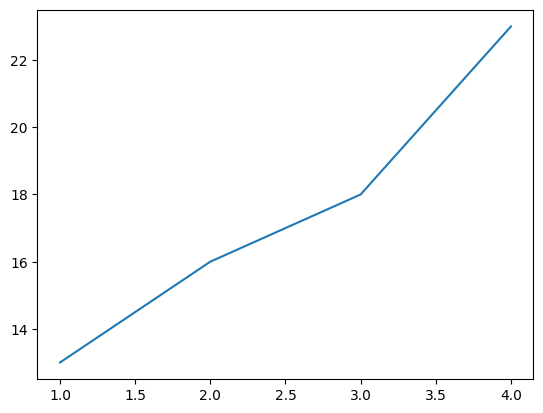

In [64]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 4], [13, 16, 18, 23])
plt.show()

Wykres możemy prosto opisać i dostosować do własnych potrzeb:

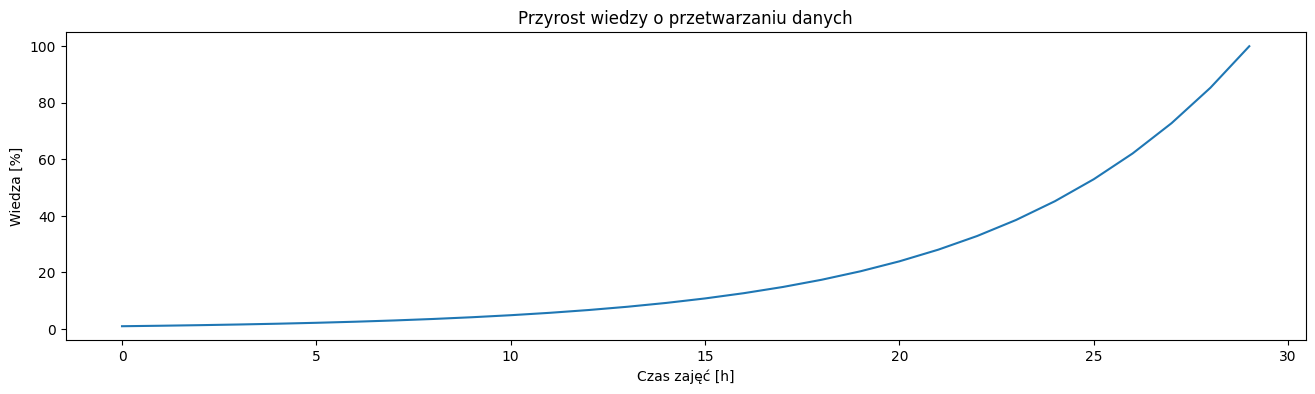

In [65]:
plt.figure(figsize=(16, 4))
plt.plot(np.arange(30), np.geomspace(1, 100, 30))
plt.title("Przyrost wiedzy o przetwarzaniu danych")
plt.xlabel("Czas zajęć [h]")
plt.ylabel("Wiedza [%]")
plt.show()

Podstawowa konfiguracja wykresu pozwala też umieszczac na nim kilka serii danych. Przydaje się wtedy umieścić legendę

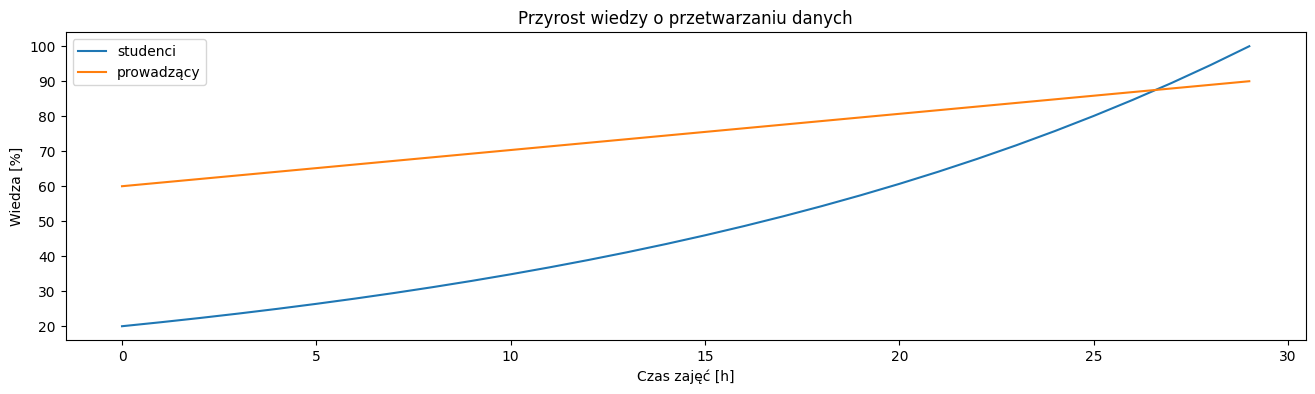

In [66]:
plt.figure(figsize=(16, 4))
plt.plot(np.arange(30), np.geomspace(20, 100, 30), label="studenci")
plt.plot(np.arange(30), np.linspace(60, 90, 30), label="prowadzący")
plt.title("Przyrost wiedzy o przetwarzaniu danych")
plt.xlabel("Czas zajęć [h]")
plt.ylabel("Wiedza [%]")
plt.legend()
plt.show()

### Podstawowa konfiguracja wyglądu wykresu


Wygląd serii danych określamy podając trzyliterowy string w formacie `[marker][kolor][linia]` po serii, w którym określamy kształt punktów danych, rodzaj linii i kolor. Przykładowo:
* `og-` - zielone kółka połączone linią ciągłą
* `^r:` - czerwone trójkąty połączone linią kropkowaną

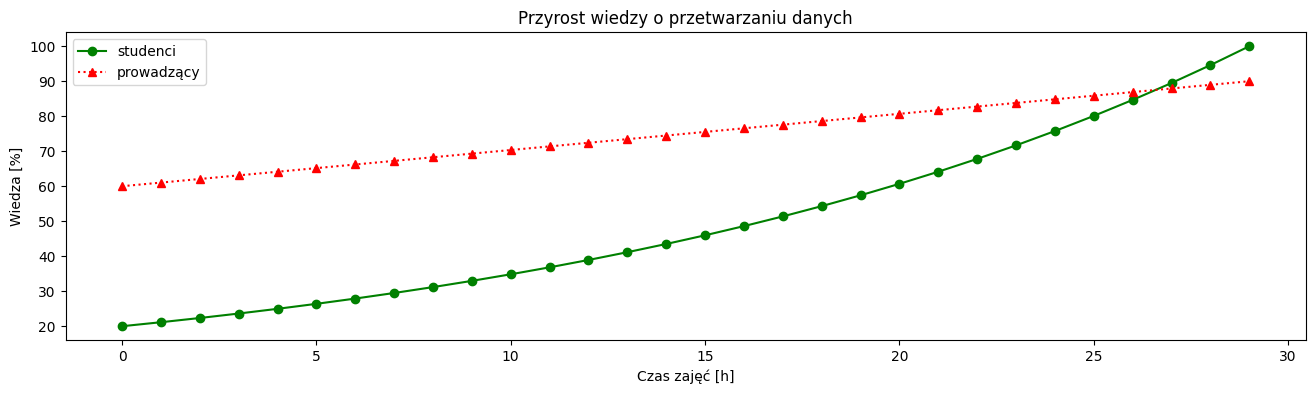

In [67]:
plt.figure(figsize=(16, 4))
plt.plot(np.arange(30), np.geomspace(20, 100, 30), "og-", label="studenci")
plt.plot(np.arange(30), np.linspace(60, 90, 30), "^r:", label="prowadzący")
plt.title("Przyrost wiedzy o przetwarzaniu danych")
plt.xlabel("Czas zajęć [h]")
plt.ylabel("Wiedza [%]")
plt.legend()
plt.show()

```{seealso}
Więcej stylów i kombinacji w sekcji `Notes` [dokumentacji](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)
```

### Typy wykresów

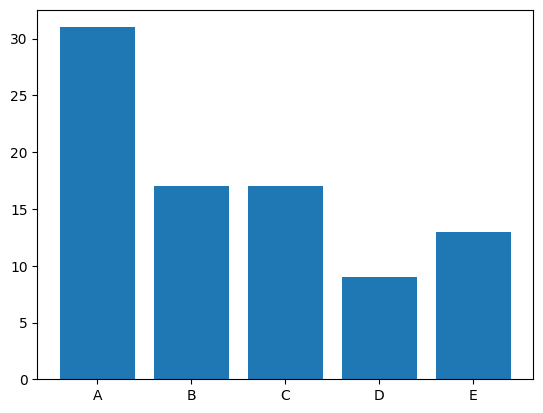

In [68]:
# wykres słupkowy

plt.bar(["A", "B", "C", "D", "E"], np.random.randint(1, 35, 5))
plt.show()

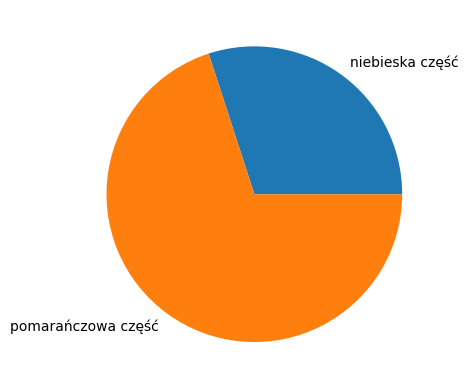

In [69]:
# wykres kołowy

plt.pie([30, 70], labels=["niebieska część", "pomarańczowa część"])
plt.show()

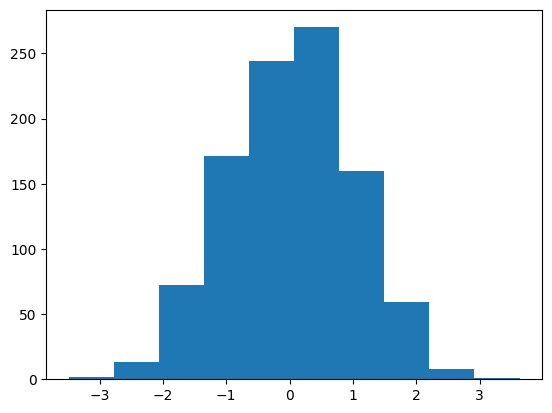

In [70]:
# histogram

plt.hist(np.random.randn(1000))
plt.show()

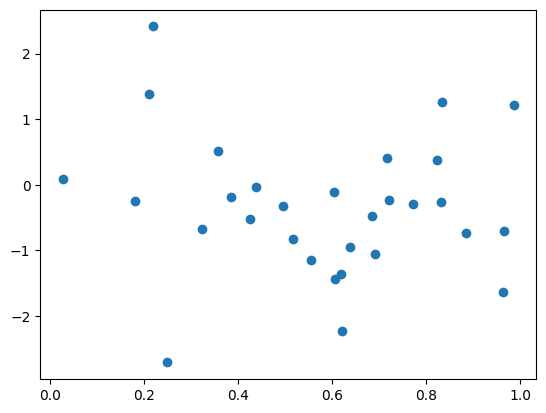

In [71]:
# wykres punktowy

plt.scatter(np.random.rand(30), np.random.randn(30))
plt.show()

### Wiele wykresów w jednej przestrzeni 

Częstym przypadkiem jest chęć umiejscowienia kilku różych wykresów na jednym `Figure`. Można to uczynić przy pomocy mechanizmu `subplot`

In [72]:
# użyjemy wczytanego na potrzeby przykladów z Pandasem zbioru Iris

df.head(1)

,sepal length,sepal width,petal length,petal width,class,high sepal ratio
0,5.1,3.5,1.4,0.2,Iris-setosa,False


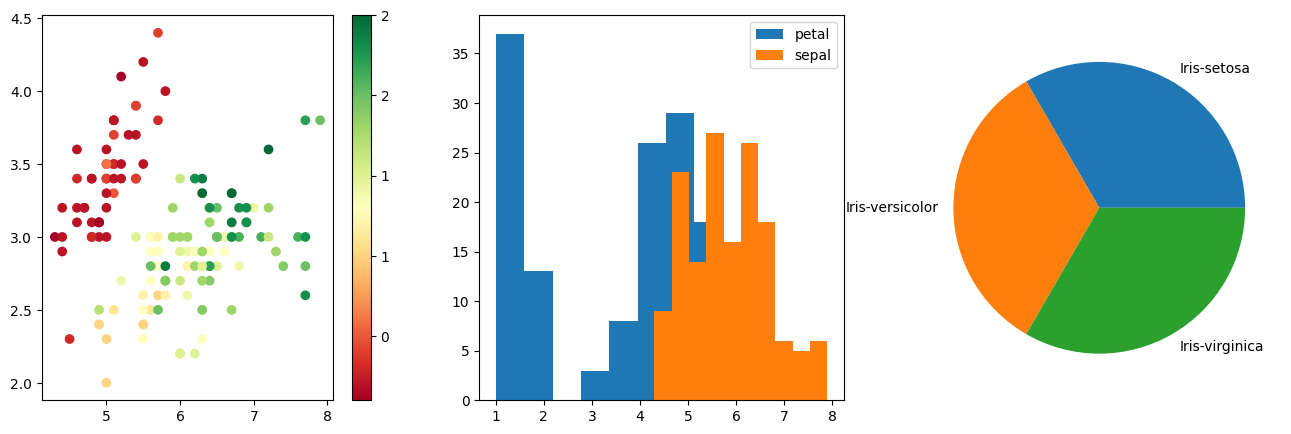

In [73]:
# tworzymy subplot składający się z jednego rzędu i trzech kolumn
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))

# tworzymy wykres punktowy pokazujący zależność długości do szerokości "działki kielicha" (sepal)
# z kolorami oznaczającymi szerokość płatka
scatter = ax1.scatter(
    df["sepal length"], df["sepal width"], c=df["petal width"], cmap="RdYlGn"
)
plt.colorbar(scatter, ax=ax1, format="%d")

# tworzymy histogramy długości płatka i działki
ax2.hist(df["petal length"], label="petal")
ax2.hist(df["sepal length"], label="sepal")
ax2.legend()

# tworzymy wykres kołowy ilości klas
ax3.pie(
    df.groupby("class").count().to_numpy()[:, 0],
    labels=df.groupby("class").count().index,
)
plt.show()